In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("https://github.com/user-attachments/files/21237007/benchmark_results.csv")
df.shape

N_BOOTSTRAPS=100

def generate_plots(df, metric="r2_train", exclude = ["SupportVectorMachine", "LightGBM"], fontsize="small"):
    simulator_list = sorted(df["simulator"].unique().tolist())
    n_iter_list = sorted(df["n_iter"].unique().tolist())
    n_splits_list = sorted(df["n_splits"].unique().tolist())
    color = {name:f"C{idx}" for idx, name in enumerate(sorted(df["model_name"].unique().tolist()))}
    for plot_idx, simulator in enumerate(simulator_list):
        fig, axs = plt.subplots(len(n_splits_list), len(n_iter_list), figsize=(12, 6))
        handles = []
        labels = []
        for row_idx, n_splits in enumerate(n_splits_list):
            for col_idx, n_iter in enumerate(n_iter_list):
                subset = df[df["simulator"].eq(simulator) & df["n_splits"].eq(n_splits) & df["n_iter"].eq(n_iter)]
                for idx, ((name,), group) in enumerate(subset.groupby(["model_name"], sort=True)): 
                    if name in exclude:
                        continue
                    ax = axs[row_idx][col_idx]
                    group_sorted = group.sort_values("n_samples")
                    line = ax.plot(group_sorted["n_samples"], group_sorted[metric], label=name, c=color[name])

                    if row_idx == 0 and col_idx == 0:
                        handles.append(line[0])
                        labels.append(name)
                    
                    mean = group_sorted[metric]
                    ste = group_sorted[f"{metric}_std"] / np.sqrt(N_BOOTSTRAPS)
                    ax.fill_between(group_sorted["n_samples"], mean - ste, mean + ste, alpha=0.2, lw=0, color=color[name])
                ax.set_ylim(0.1, 1.1)
                ax.set_xlim(df["n_samples"].min(), df["n_samples"].max())
                ax.axhline(0., lw=0.5, ls="--", c="grey", alpha=0.5, zorder=-1)
                
                ax.set_xscale("log")
                # ax.set_yscale("log")
                if col_idx == 0:
                    ax.set_ylabel(metric, size=fontsize)
                if row_idx == len(n_splits_list)-1:
                    ax.set_xlabel("n_samples", size=fontsize)
                ax.tick_params(labelsize=fontsize)
                ax.set_title(f"{simulator} (n_iter={n_iter}, n_splits={n_splits})", size=fontsize)
        
        fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=df["model_name"].nunique()-len(exclude), fontsize=fontsize)
        
        # Adjust layout to make room for legend
        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        
        plt.show()


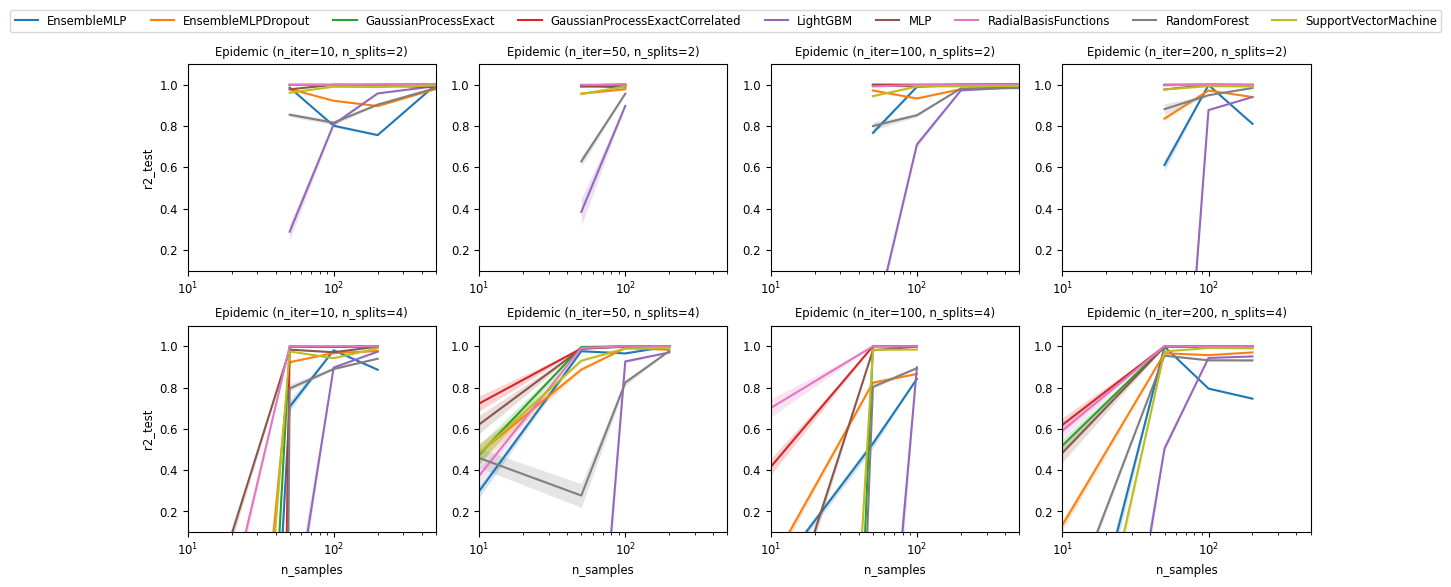

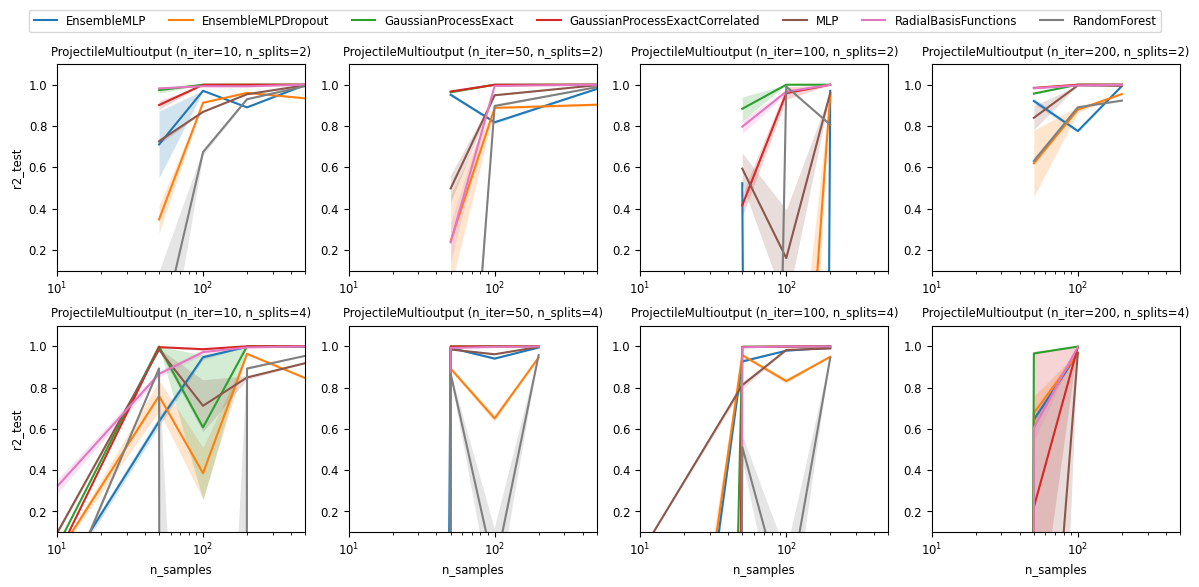

In [2]:
generate_plots(df, metric="r2_test", exclude=[])
# generate_plots(df, metric="r2_test", exclude=["EnsembleMLP", "EnsembleMLPDropout", "RandomForest", "LightGBM", "SupportVectorMachine", "RadialBasisFunctions"])